In [686]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
%matplotlib inline

In [687]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [688]:
data.shape

(918, 12)

<h3>Removing duplicates from the dataset</h3>

In [689]:
data.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [690]:
type(data)

pandas.core.frame.DataFrame

<h2>Sorting dataset by age and filtering it to above 50 </h2>

In [691]:
data = data.sort_values("Age")
data = data[data["Age"] > 50]
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
721,51,M,NAP,100,222,0,Normal,143,Y,1.2,Flat,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
681,51,M,ASY,140,261,0,LVH,186,Y,0.0,Up,0
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1
401,51,M,ASY,130,0,1,ST,163,N,0.0,Flat,1


In [692]:
data.shape

(602, 12)

In [693]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 721 to 447
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             602 non-null    int64  
 1   Sex             602 non-null    object 
 2   ChestPainType   602 non-null    object 
 3   RestingBP       602 non-null    int64  
 4   Cholesterol     602 non-null    int64  
 5   FastingBS       602 non-null    int64  
 6   RestingECG      602 non-null    object 
 7   MaxHR           602 non-null    int64  
 8   ExerciseAngina  602 non-null    object 
 9   Oldpeak         602 non-null    float64
 10  ST_Slope        602 non-null    object 
 11  HeartDisease    602 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 61.1+ KB


<h3>From this information, we can tell that there is no NULL values in the filtered dataset.</h3>

<AxesSubplot:xlabel='count', ylabel='HeartDisease'>

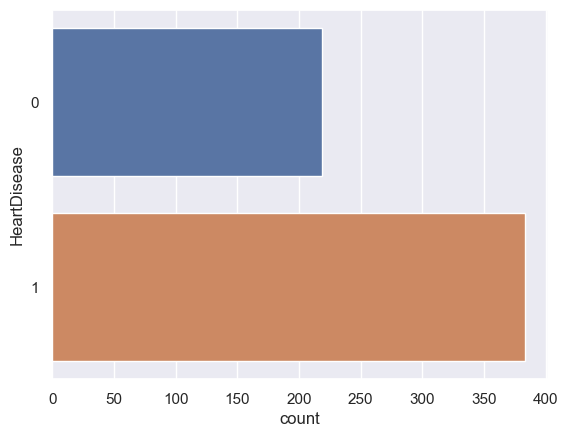

In [694]:
sb.countplot(data = data, y = "HeartDisease")

In [695]:
count0, count1 = data["HeartDisease"].value_counts()
print("Ratio of classes 0 : 1 = ",count0, ":", count1)

Ratio of classes 0 : 1 =  383 : 219


<h3>From this countplot, we observe that there is a class imbalance which might affect the accuracy of our model.</h3>

<h3>We are selecting the features that we want to use to predict HeartDisease</h3>

In [696]:
data1 = pd.DataFrame(data[["Cholesterol", "RestingBP", "MaxHR", "HeartDisease"]])

In [697]:
data1

,Cholesterol,RestingBP,MaxHR,HeartDisease
721,222,100,143,0
334,0,130,170,1
681,261,140,186,0
390,0,140,60,1
401,0,130,163,1
...,...,...,...,...
491,203,170,108,1
541,113,104,120,1
688,197,140,116,0
814,304,125,162,1


In [698]:
data1.describe()

,Cholesterol,RestingBP,MaxHR,HeartDisease
count,602.000000,602.000000,602.000000,602.000000
mean,191.149502,135.186047,130.860465,0.636213
std,117.316859,19.060075,24.249407,0.481489
min,0.000000,0.000000,60.000000,0.000000
25%,152.250000,122.000000,114.250000,0.000000
50%,221.000000,133.500000,130.000000,1.000000
75%,268.750000,145.000000,150.000000,1.000000
max,603.000000,200.000000,195.000000,1.000000


<h3>Respective boxplots, with x being the predictor and y being HeartDisease(Response)</h3>

<AxesSubplot:xlabel='Cholesterol', ylabel='HeartDisease'>

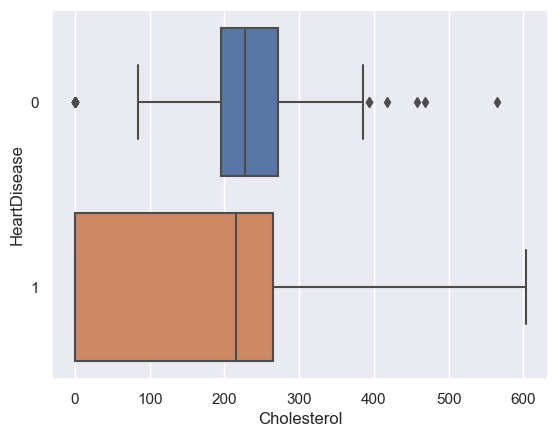

In [699]:
sb.boxplot(data = data1, orient = 'h', x = "Cholesterol", y = "HeartDisease")

<AxesSubplot:xlabel='RestingBP', ylabel='HeartDisease'>

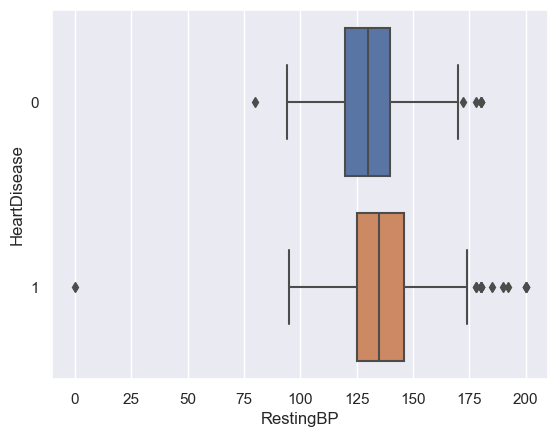

In [700]:
sb.boxplot(data = data1, orient = 'h', x = "RestingBP", y = "HeartDisease")

<AxesSubplot:xlabel='MaxHR', ylabel='HeartDisease'>

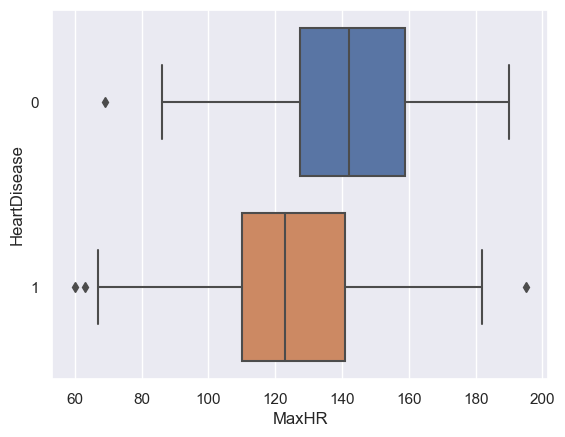

In [701]:
sb.boxplot(data = data1, orient = 'h', x = "MaxHR", y = "HeartDisease")

<h3>From the boxplots above, we can observe that the boxplot of Cholesterol against the levels of HeartDisease have the most significant difference, followed by MaxHR and then RestingBP. This tells us that Cholesterol might be the most "important" in differentiating between the levels of HeartDisease </h3>

<h3>Splitting the dataset into Train and Test</h3>

In [702]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

X = pd.DataFrame(data1[[ "Cholesterol", "RestingBP", "MaxHR"]])
y = pd.DataFrame(data1["HeartDisease"])

In [703]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Train Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)

Train Set: (481, 3) (481, 1)
Test Set: (121, 3) (121, 1)


<h3>Decision Tree (Depth = 4) with no sampling</h3>

In [704]:
tree1 = DecisionTreeClassifier(max_depth = 4)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5089285714285714, 0.9, 'MaxHR <= 132.5\ngini = 0.467\nsamples = 481\nvalue = [179, 302]\nclass = 1'),
 Text(0.2857142857142857, 0.7, 'Cholesterol <= 144.0\ngini = 0.355\nsamples = 256\nvalue = [59, 197]\nclass = 1'),
 Text(0.14285714285714285, 0.5, 'MaxHR <= 113.5\ngini = 0.153\nsamples = 84\nvalue = [7, 77]\nclass = 1'),
 Text(0.07142857142857142, 0.3, 'RestingBP <= 121.0\ngini = 0.043\nsamples = 45\nvalue = [1, 44]\nclass = 1'),
 Text(0.03571428571428571, 0.1, 'gini = 0.111\nsamples = 17\nvalue = [1, 16]\nclass = 1'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]\nclass = 1'),
 Text(0.21428571428571427, 0.3, 'RestingBP <= 123.0\ngini = 0.26\nsamples = 39\nvalue = [6, 33]\nclass = 1'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = 1'),
 Text(0.25, 0.1, 'gini = 0.355\nsamples = 26\nvalue = [6, 20]\nclass = 1'),
 Text(0.42857142857142855, 0.5, 'RestingBP <= 130.5\ngini = 0.422\nsamples = 172\nvalue = [52, 120]\nc

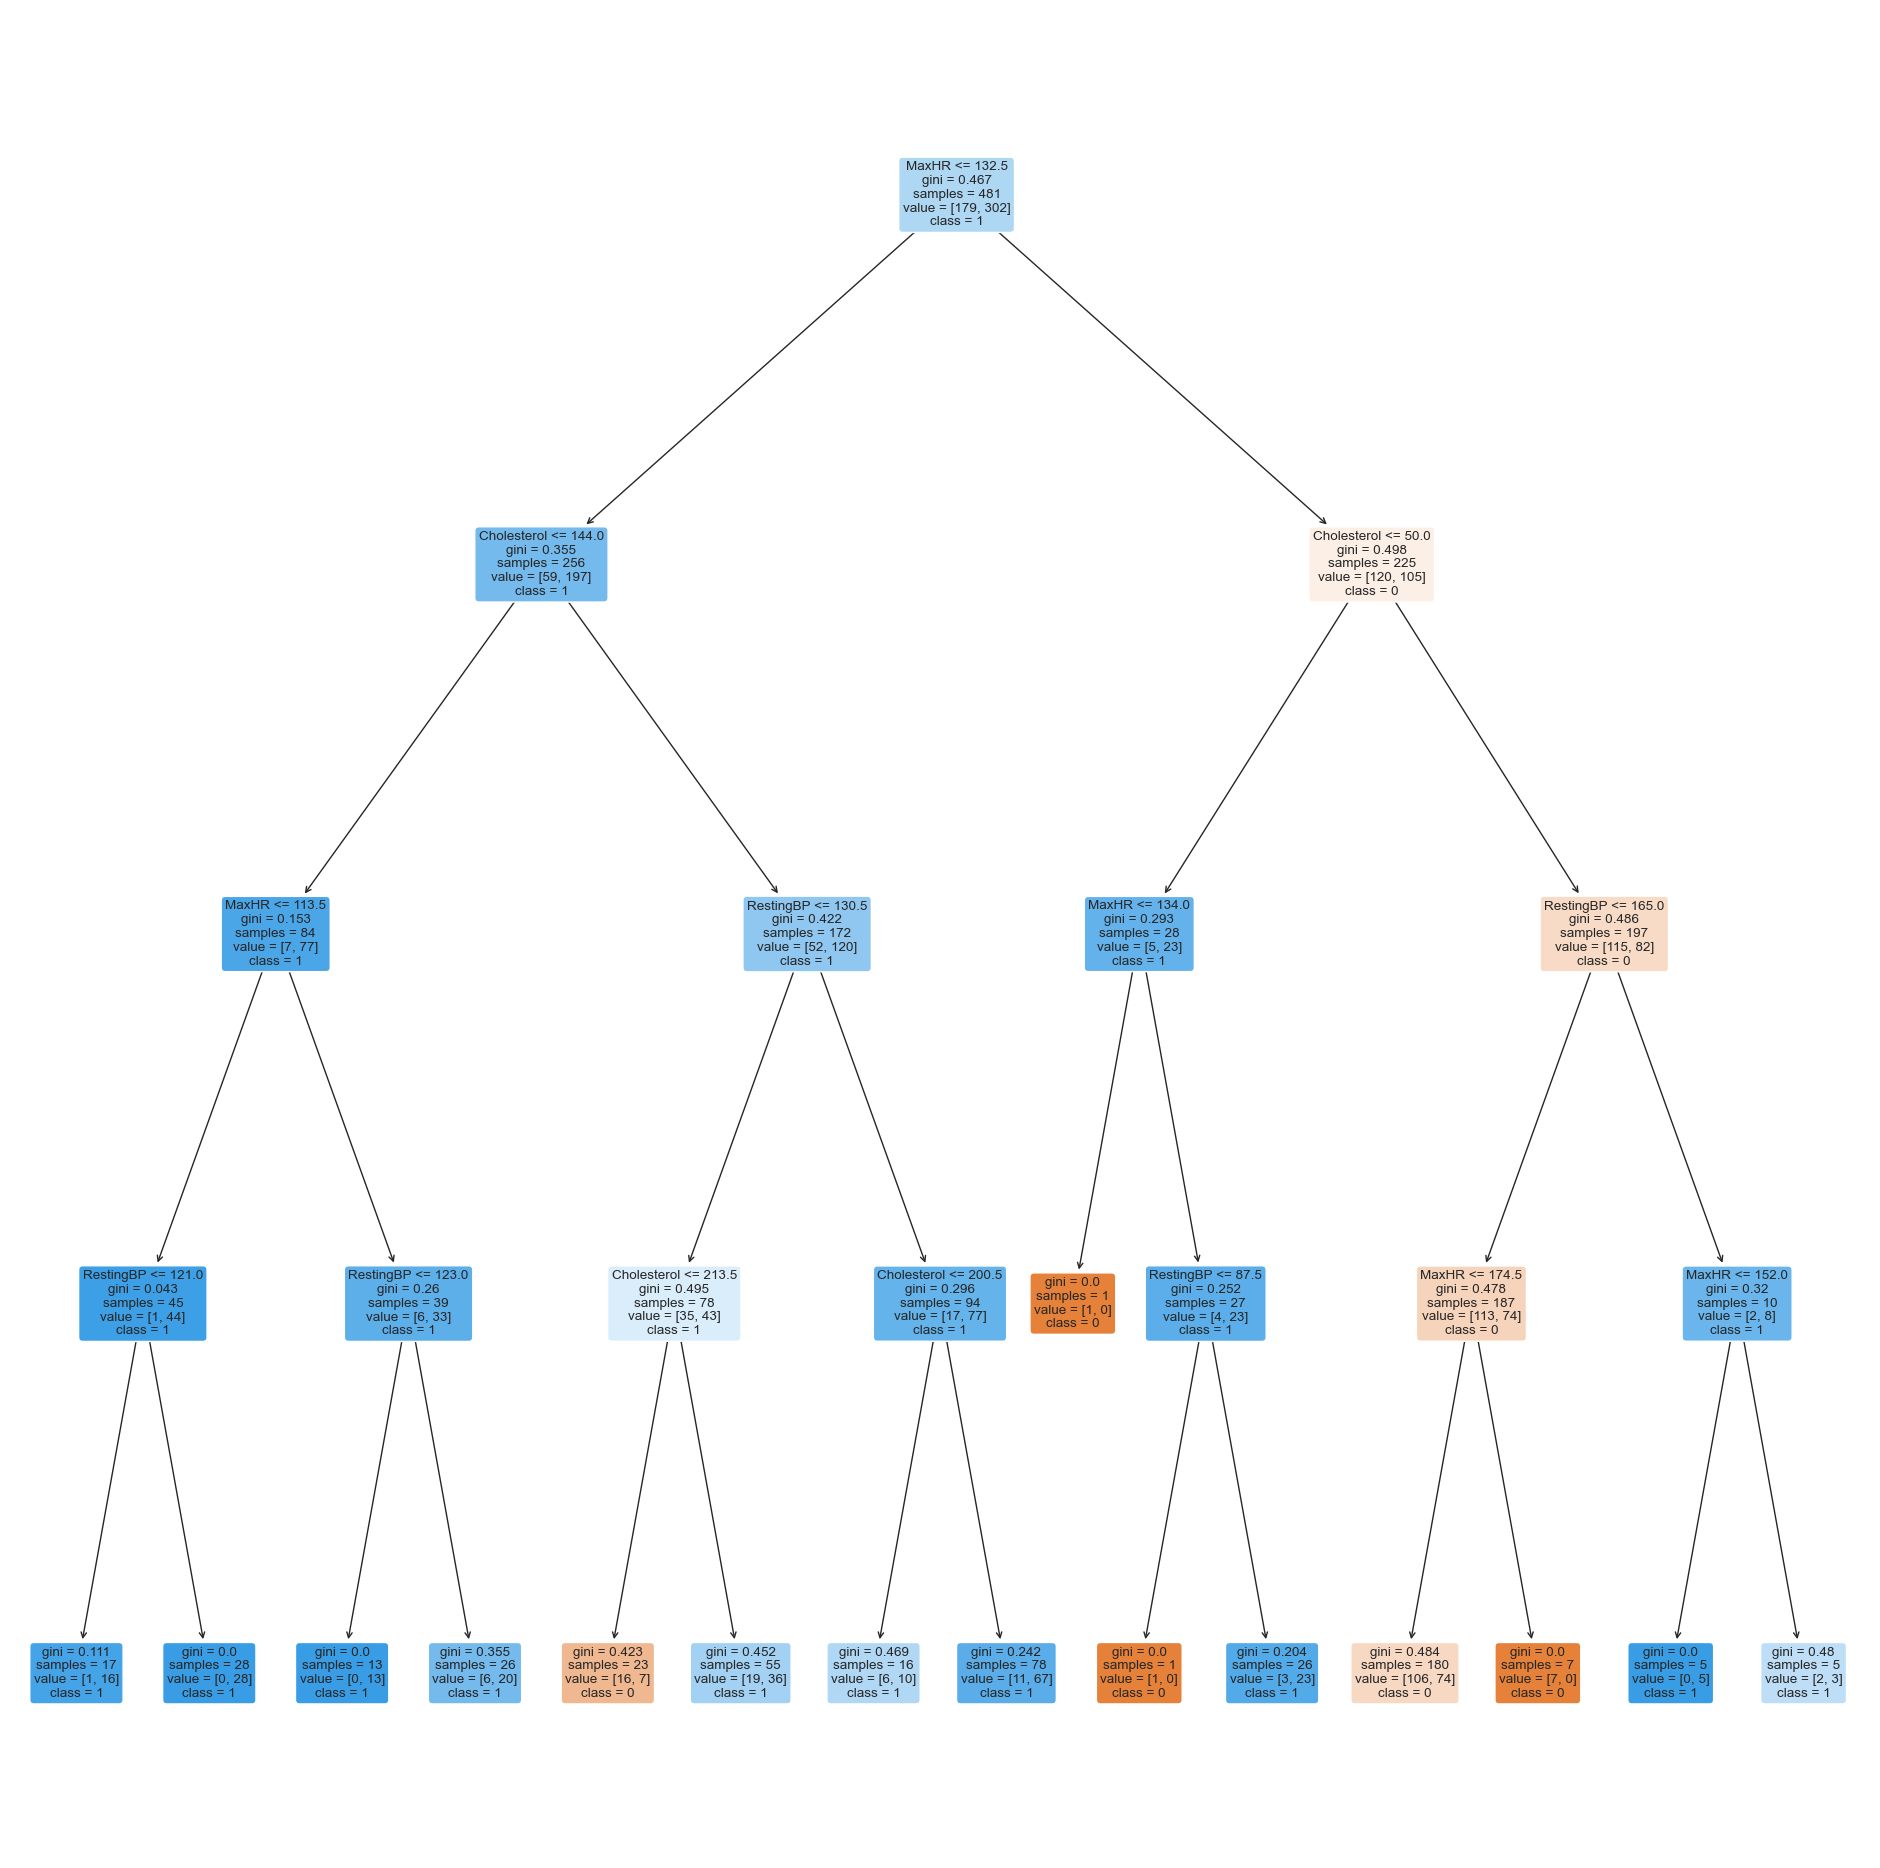

In [705]:
f = plt.figure(figsize = (24,24))
plot_tree(tree1, filled = True, rounded = True,
         feature_names = X_train.columns,
         class_names = ["0", "1"])

<h3>From the tree, we can tell that the most important factors in predicting whether one have a Heart Disease in descending order is : MaxHR, Cholesterol, RestingBP as MaxHR appears higher up in the tree, followed by the rest.</h3>

<AxesSubplot:>

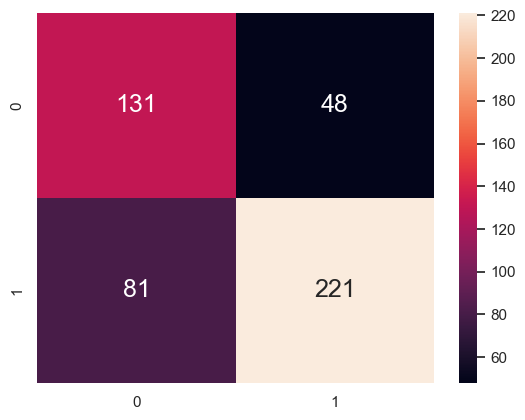

In [706]:
y_train_pred = tree1.predict(X_train)

# Plot the Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [707]:
print("Train Data")
print("Accuracy  :\t", tree1.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives
fpTrain = cmTrain[0][1] # False Positives
tnTrain = cmTrain[0][0] # True Negatives
fnTrain = cmTrain[1][0] # False Negatives

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.7318087318087318

TPR Train :	 0.7317880794701986
TNR Train :	 0.7318435754189944

FPR Train :	 0.2681564245810056
FNR Train :	 0.2682119205298013


<AxesSubplot:>

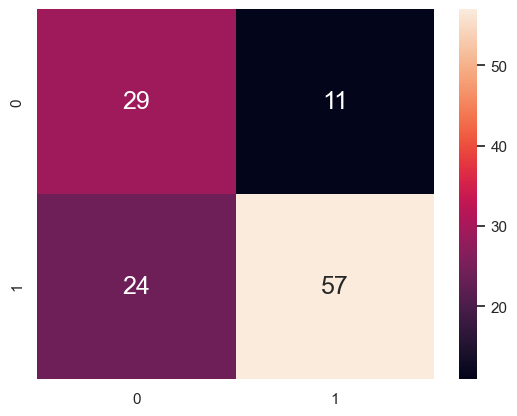

In [708]:
y_test_pred = tree1.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [709]:
print("Test Data")
print("Accuracy  :\t", tree1.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives
fpTest = cmTest[0][1] # False Positives
tnTest = cmTest[0][0] # True Negatives
fnTest = cmTest[1][0] # False Negatives

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.7107438016528925

TPR Test :	 0.7037037037037037
TNR Test :	 0.725

FPR Test :	 0.275
FNR Test :	 0.2962962962962963


<h3>Using resampling to fix class imbalance</h3>

In [710]:
from sklearn.utils import resample

heart1 = data1[data1.HeartDisease == 1]
heart0 = data1[data1.HeartDisease == 0]

In [711]:
heart0_up = resample(heart0, 
                    replace=True,                     
                    n_samples=heart1.shape[0])

In [712]:
data1_up = pd.concat([heart1, heart0_up])

In [713]:
data1_up["HeartDisease"].value_counts()

1    383
0    383
Name: HeartDisease, dtype: int64

In [714]:
data1_up

,Cholesterol,RestingBP,MaxHR,HeartDisease
334,0,130,170,1
390,0,140,60,1
401,0,130,163,1
344,0,120,104,1
791,298,140,122,1
...,...,...,...,...
851,234,138,160,0
694,236,120,178,0
679,233,145,150,0
503,227,132,138,0


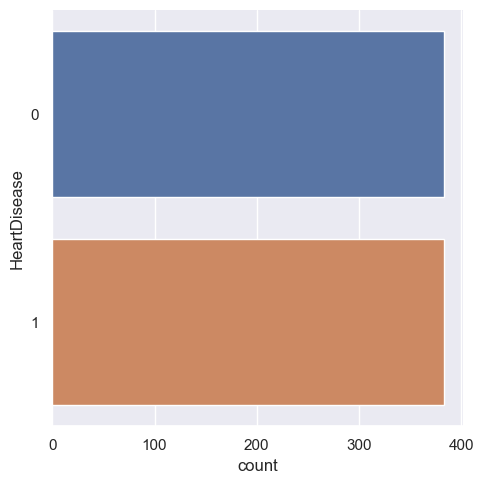

In [715]:
sb.catplot(y = "HeartDisease", data = data1_up, kind = "count")

In [716]:
data1_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 334 to 780
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Cholesterol   766 non-null    int64
 1   RestingBP     766 non-null    int64
 2   MaxHR         766 non-null    int64
 3   HeartDisease  766 non-null    int64
dtypes: int64(4)
memory usage: 29.9 KB


<h3>Splitting the data which have been resampled to Train and Test </h3>

In [717]:
y = pd.DataFrame(data1_up["HeartDisease"])
X = pd.DataFrame(data1_up[["Cholesterol", "RestingBP", "MaxHR"]])

In [718]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.2)

<h3>Decision Tree (Depth = 4) with Resampled dataset</h3>

In [719]:
tree2 = DecisionTreeClassifier(max_depth = 4)
tree2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5431034482758621, 0.9, 'MaxHR <= 129.5\ngini = 0.5\nsamples = 612\nvalue = [308, 304]\nclass = 0'),
 Text(0.27586206896551724, 0.7, 'Cholesterol <= 166.5\ngini = 0.417\nsamples = 253\nvalue = [75, 178]\nclass = 1'),
 Text(0.13793103448275862, 0.5, 'MaxHR <= 113.0\ngini = 0.273\nsamples = 92\nvalue = [15, 77]\nclass = 1'),
 Text(0.06896551724137931, 0.3, 'RestingBP <= 129.0\ngini = 0.089\nsamples = 43\nvalue = [2, 41]\nclass = 1'),
 Text(0.034482758620689655, 0.1, 'gini = 0.188\nsamples = 19\nvalue = [2, 17]\nclass = 1'),
 Text(0.10344827586206896, 0.1, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]\nclass = 1'),
 Text(0.20689655172413793, 0.3, 'MaxHR <= 120.5\ngini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = 1'),
 Text(0.1724137931034483, 0.1, 'gini = 0.478\nsamples = 33\nvalue = [13, 20]\nclass = 1'),
 Text(0.2413793103448276, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = 1'),
 Text(0.41379310344827586, 0.5, 'RestingBP <= 135.5\ngini = 0.468\nsamples = 161\nvalue = 

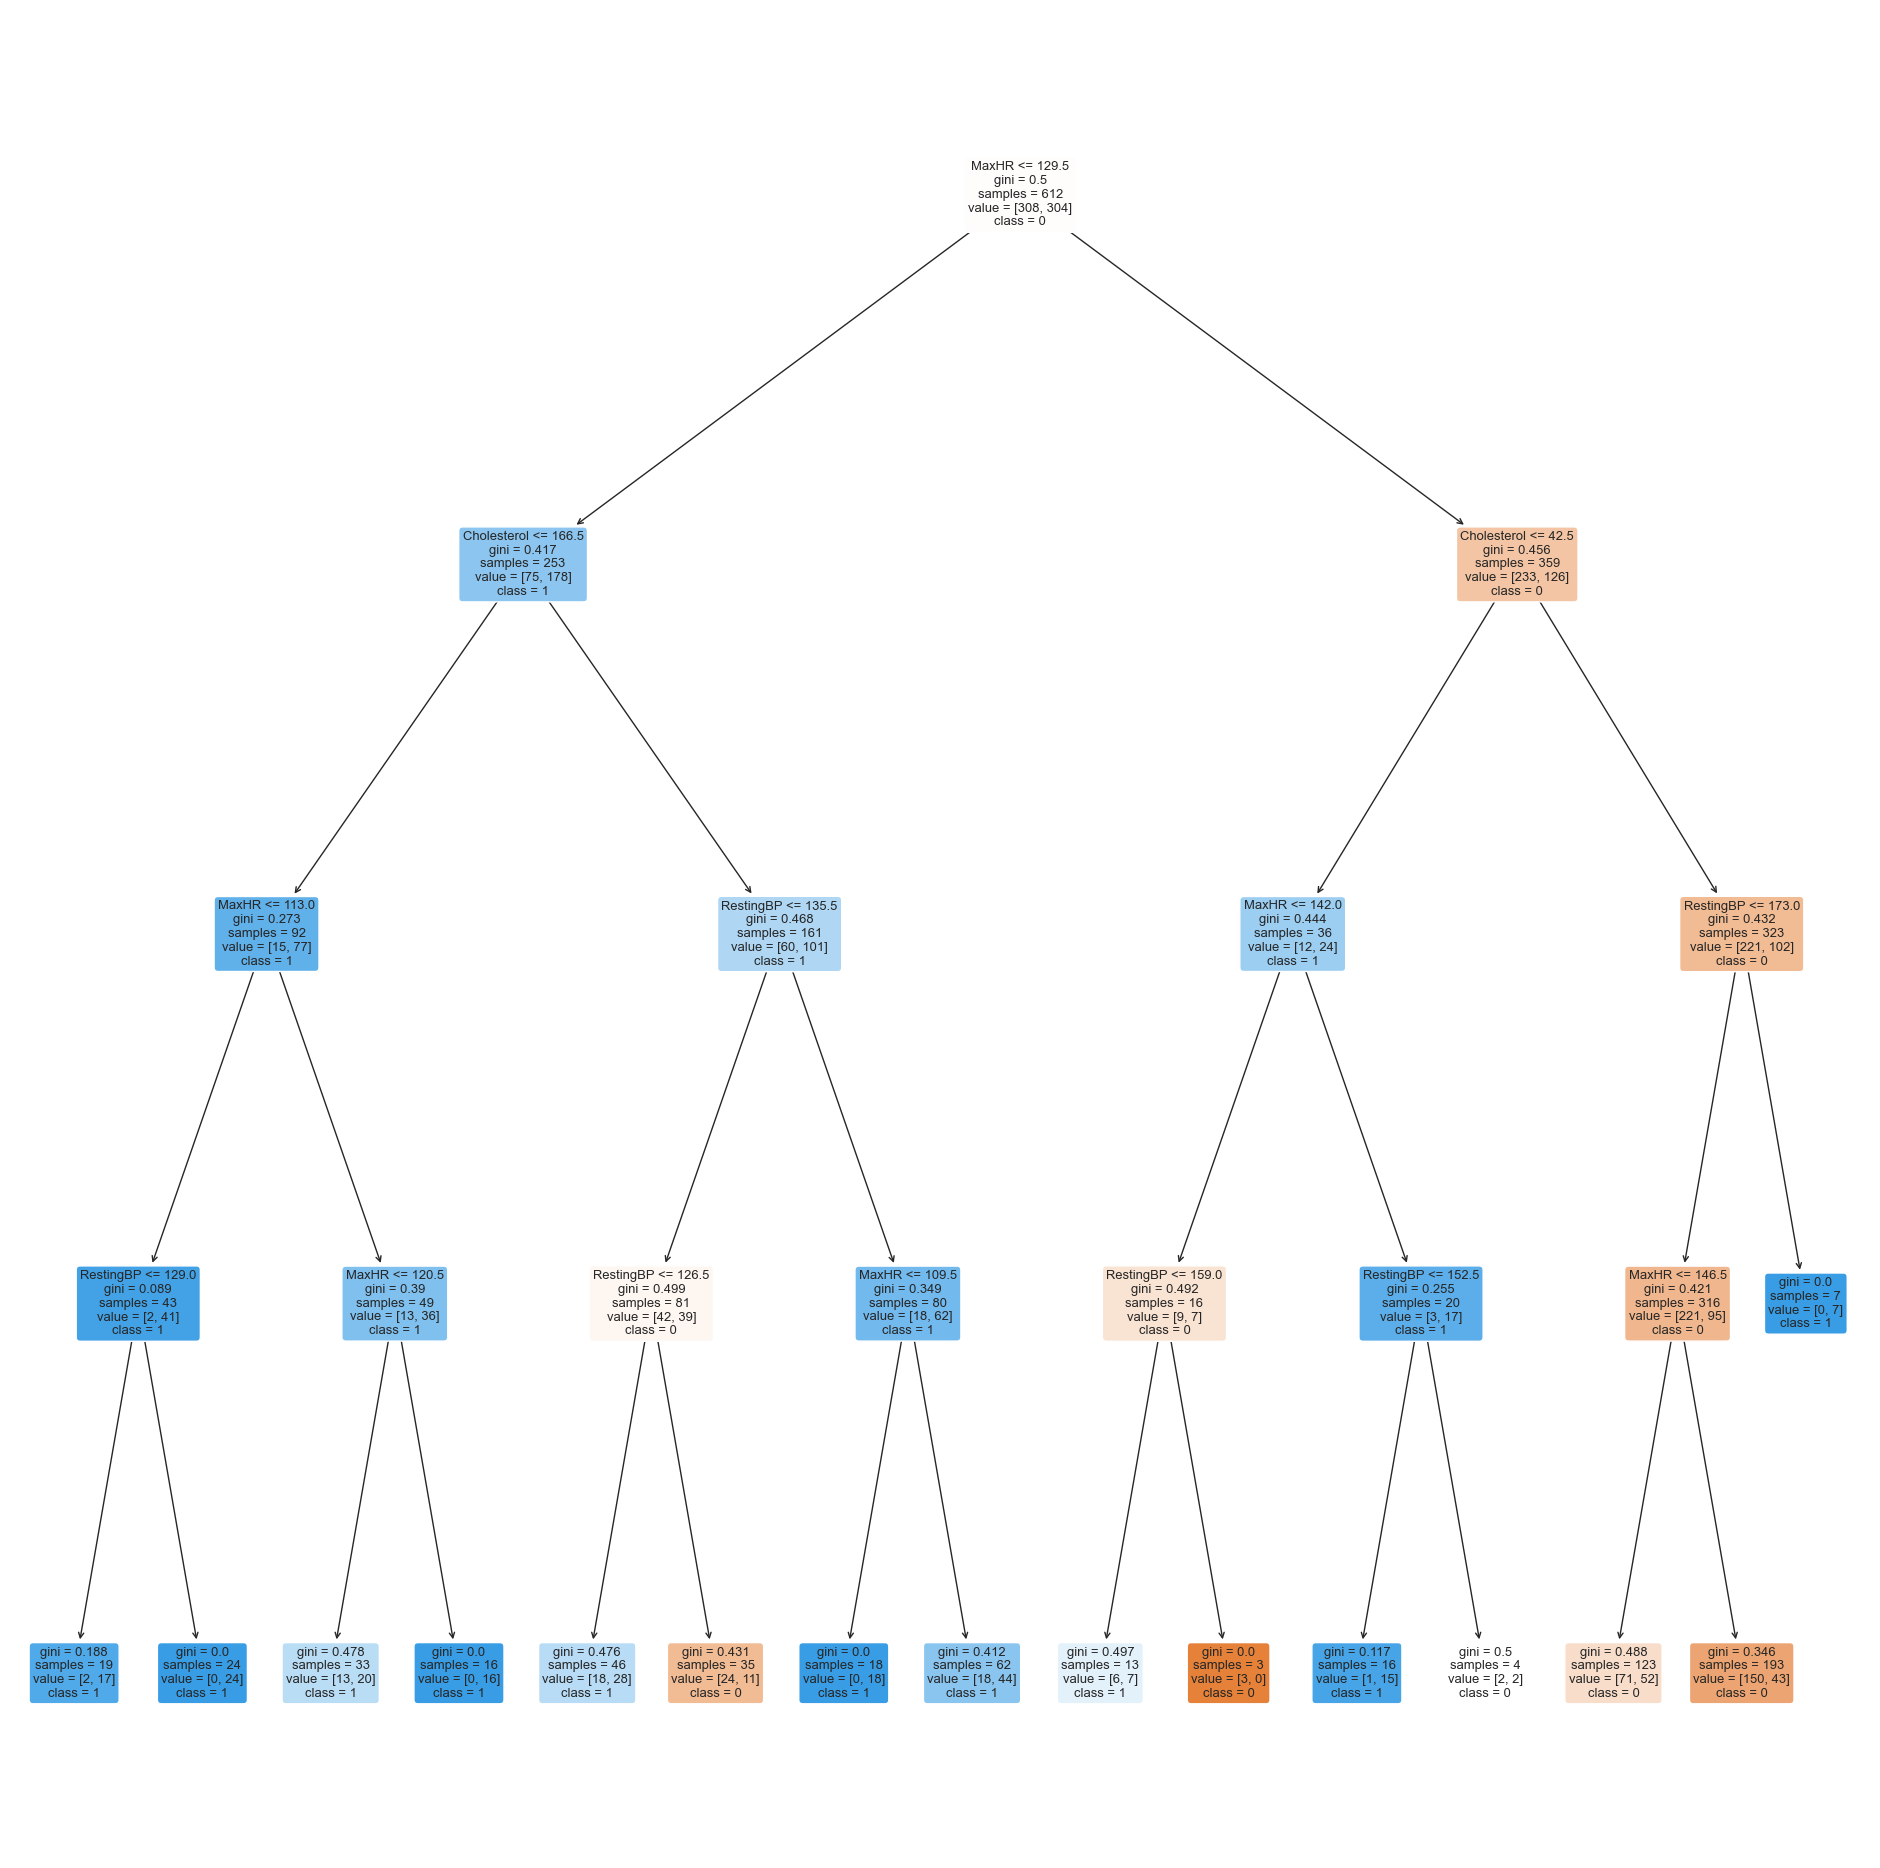

In [720]:
f = plt.figure(figsize = (24,24))
plot_tree(tree2, filled = True, rounded = True,
         feature_names = X2_train.columns,
         class_names = ["0", "1"])

<h3>From the tree, we can tell that the most important factors in predicting whether one have a Heart Disease in descending order is : MaxHR, Cholesterol, RestingBP as MaxHR appears higher up in the tree, followed by the rest.</h3>

Train Data
Accuracy  :	 0.7287581699346405

TPR Train :	 0.6447368421052632
TNR Train :	 0.8116883116883117

FPR Train :	 0.18831168831168832
FNR Train :	 0.35526315789473684


<AxesSubplot:>

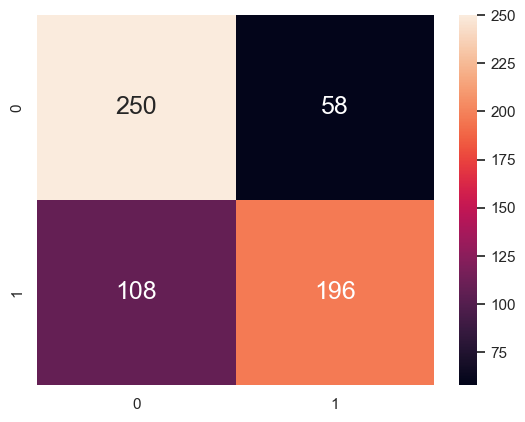

In [721]:
y2_train_pred = tree2.predict(X2_train)

print("Train Data")
print("Accuracy  :\t", tree2.score(X2_train, y2_train))
print()

cmTrain2 = confusion_matrix(y2_train, y2_train_pred)
tpTrain2 = cmTrain2[1][1] # True Positives
fpTrain2 = cmTrain2[0][1] # False Positives
tnTrain2 = cmTrain2[0][0] # True Negatives
fnTrain2 = cmTrain2[1][0] # False Negatives

print("TPR Train :\t", (tpTrain2/(tpTrain2 + fnTrain2)))
print("TNR Train :\t", (tnTrain2/(tnTrain2 + fpTrain2)))
print()

print("FPR Train :\t", (fpTrain2/(tnTrain2 + fpTrain2)))
print("FNR Train :\t", (fnTrain2/(tpTrain2 + fnTrain2)))

sb.heatmap(confusion_matrix(y2_train, y2_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7077922077922078

TPR Test :	 0.6455696202531646
TNR Test :	 0.7733333333333333

FPR Test :	 0.22666666666666666
FNR Test :	 0.35443037974683544


<AxesSubplot:>

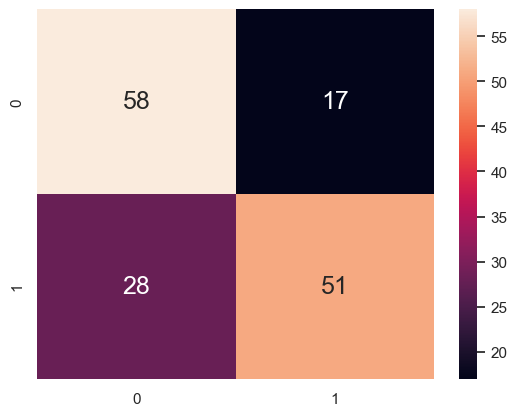

In [722]:
y2_test_pred = tree2.predict(X2_test)

print("Test Data")
print("Accuracy  :\t", tree2.score(X2_test, y2_test))
print()

cmTest2 = confusion_matrix(y2_test, y2_test_pred)
tpTest2 = cmTest2[1][1] # True Positives
fpTest2 = cmTest2[0][1] # False Positives
tnTest2 = cmTest2[0][0] # True Negatives
fnTest2 = cmTest2[1][0] # False Negatives

print("TPR Test :\t", (tpTest2/(tpTest2 + fnTest2)))
print("TNR Test :\t", (tnTest2/(tnTest2 + fpTest2)))
print()

print("FPR Test :\t", (fpTest2/(fpTest2 + tnTest2)))
print("FNR Test :\t", (fnTest2/(fnTest2 + tpTest2)))

sb.heatmap(confusion_matrix(y2_test, y2_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

<h3>Without resampling and with resampling</h3>

In [723]:
print("Metrics from the tree with no sampling")
print("Classification accuracy:", tree1.score(X_test, y_test))
print()

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

print()

print("Metrics from the tree with resampling")
print("Classification accuracy:", tree2.score(X2_test, y2_test))
print()

print("TPR Test :\t", (tpTest2/(tpTest2 + fnTest2)))
print("TNR Test :\t", (tnTest2/(tnTest2 + fpTest2)))
print()

print("FPR Test :\t", (fpTest2/(fpTest2 + tnTest2)))
print("FNR Test :\t", (fnTest2/(fnTest2 + tpTest2)))

Metrics from the tree with no sampling
Classification accuracy: 0.7107438016528925

TPR Test :	 0.7037037037037037
TNR Test :	 0.725

FPR Test :	 0.275
FNR Test :	 0.2962962962962963

Metrics from the tree with resampling
Classification accuracy: 0.7077922077922078

TPR Test :	 0.6455696202531646
TNR Test :	 0.7733333333333333

FPR Test :	 0.22666666666666666
FNR Test :	 0.35443037974683544


<h3>Classification accuracy of the model on the resampled dataset have a lower classification accuracy as well as a higher false negative rate</h3>

<h3>Preparing the dataset required for Logistic Regression</h3>

In [724]:
restingbp_train = pd.DataFrame(X_train["RestingBP"])
restingbp_test = pd.DataFrame(X_test["RestingBP"])

In [725]:
cholesterol_train = pd.DataFrame (X_train["Cholesterol"])
cholesterol_test = pd.DataFrame(X_test["Cholesterol"])

In [726]:
maxhr_train = pd.DataFrame(X_train["MaxHR"])
maxhr_test = pd.DataFrame(X_test["MaxHR"])

In [727]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

<h3>Logistic Regression using RestingBP</h3>

In [728]:
model1 = LogisticRegression(solver = 'liblinear', random_state = 0)
y_train = np.ravel(y_train)
model1.fit(restingbp_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

<AxesSubplot:xlabel='RestingBP'>

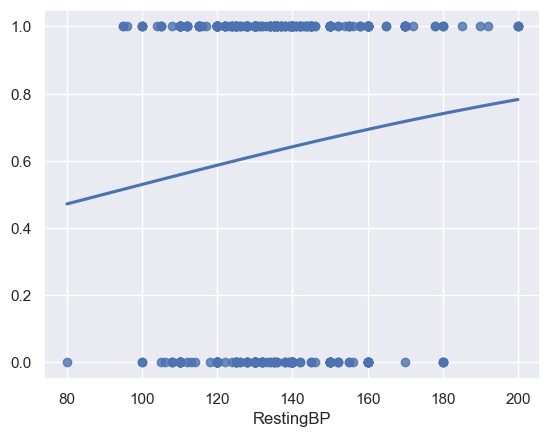

In [729]:
sb.regplot(x = restingbp_train, y = y_train, data = data1, logistic = True, ci = None)

In [730]:
model1.coef_

array([[0.0089854]])

In [731]:
y_train_predbp = model1.predict(restingbp_train)

<AxesSubplot:>

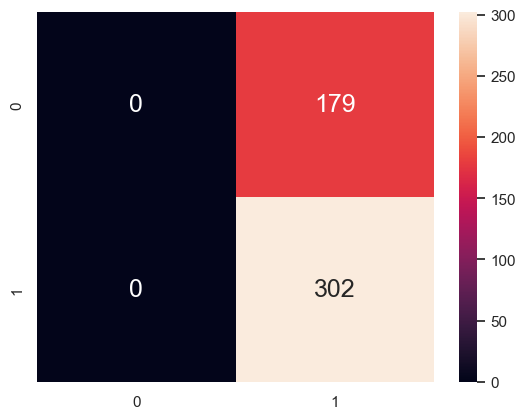

In [732]:
sb.heatmap(confusion_matrix(y_train, y_train_predbp), annot = True, fmt = ".0f", annot_kws = {"size" : 18})

In [733]:
print("Train Data")
print("Accuracy  :\t", model1.score(restingbp_train, y_train))
print()

cmTrainBP = confusion_matrix(y_train, y_train_predbp)
tpTrainBP = cmTrainBP[1][1] # True Positives
fpTrainBP = cmTrainBP[0][1] # False Positives
tnTrainBP = cmTrainBP[0][0] # True Negatives
fnTrainBP = cmTrainBP[1][0] # False Negatives

print("TPR Train :\t", (tpTrainBP/(tpTrainBP + fnTrainBP)))
print("TNR Train :\t", (tnTrainBP/(tnTrainBP + fpTrainBP)))
print()

print("FPR Train :\t", (fpTrainBP/(tnTrainBP + fpTrainBP)))
print("FNR Train :\t", (fnTrainBP/(tpTrainBP + fnTrainBP)))

Train Data
Accuracy  :	 0.6278586278586279

TPR Train :	 1.0
TNR Train :	 0.0

FPR Train :	 1.0
FNR Train :	 0.0


In [734]:
y_test_predbp = model1.predict(restingbp_test)

<AxesSubplot:>

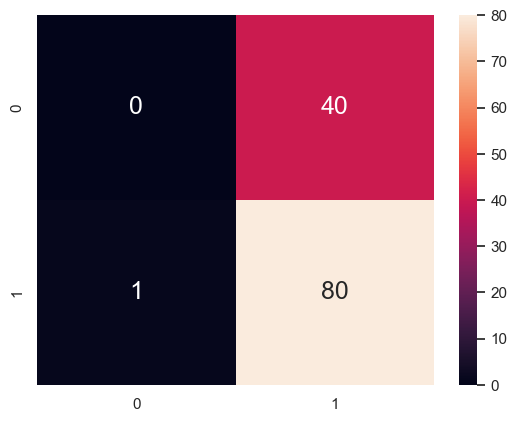

In [735]:
sb.heatmap(confusion_matrix(y_test, y_test_predbp), annot = True, fmt = ".0f", annot_kws = {"size" : 18})

In [736]:
print("Test Data")
print("Accuracy  :\t", model1.score(restingbp_test, y_test))
print()

cmTestBP = confusion_matrix(y_test, y_test_pred)
tpTestBP = cmTestBP[1][1] # True Positives
fpTestBP = cmTestBP[0][1] # False Positives
tnTestBP = cmTestBP[0][0] # True Negatives
fnTestBP = cmTestBP[1][0] # False Negatives

print("TPR Test :\t", (tpTestBP/(tpTestBP + fnTestBP)))
print("TNR Test :\t", (tnTestBP/(tnTestBP + fpTestBP)))
print()

print("FPR Test :\t", (fpTestBP/(fpTestBP + tnTestBP)))
print("FNR Test :\t", (fnTestBP/(fnTestBP + tpTestBP)))

Test Data
Accuracy  :	 0.6611570247933884

TPR Test :	 0.7037037037037037
TNR Test :	 0.725

FPR Test :	 0.275
FNR Test :	 0.2962962962962963


<h3>Logistic Regression using Cholesterol</h3>

In [737]:
model2 = LogisticRegression(solver = 'liblinear', random_state = 0)
model2.fit(cholesterol_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [738]:
model2.coef_

array([[-0.0040239]])

<AxesSubplot:xlabel='Cholesterol'>

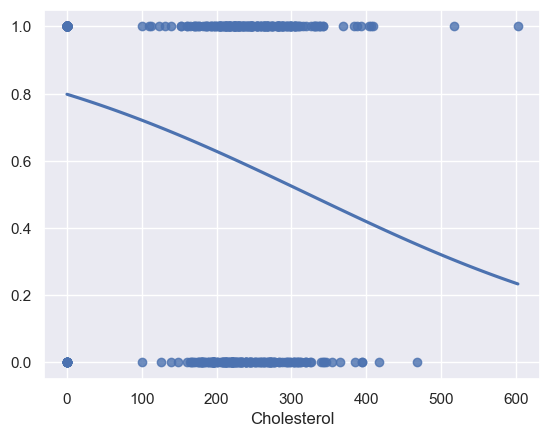

In [739]:
sb.regplot(x = cholesterol_train, y = y_train, data = data1, logistic = True, ci = None)

In [740]:
y_train_predcl = model2.predict(cholesterol_train)

<AxesSubplot:>

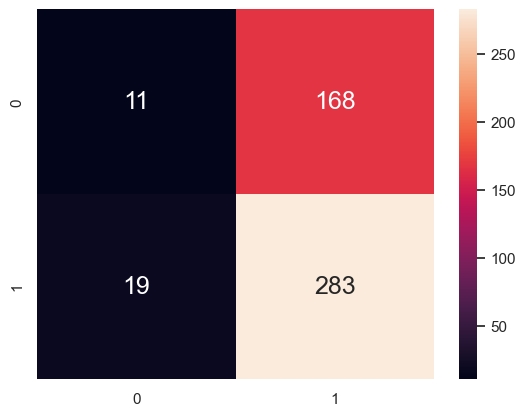

In [741]:
sb.heatmap(confusion_matrix(y_train, y_train_predcl), annot = True, fmt = ".0f", annot_kws = {"size" : 18})

In [742]:
print("Train Data")
print("Accuracy  :\t", model2.score(cholesterol_train, y_train))
print()

cmTraincl = confusion_matrix(y_train, y_train_predcl)
tpTraincl = cmTraincl[1][1] # True Positives
fpTraincl = cmTraincl[0][1] # False Positives
tnTraincl = cmTraincl[0][0] # True Negatives
fnTraincl = cmTraincl[1][0] # False Negatives

print("TPR Train :\t", (tpTraincl/(tpTraincl + fnTraincl)))
print("TNR Train :\t", (tnTraincl/(tnTraincl + fpTraincl)))
print()

print("FPR Train :\t", (fpTraincl/(tnTraincl + fpTraincl)))
print("FNR Train :\t", (fnTraincl/(tpTraincl + fnTraincl)))

Train Data
Accuracy  :	 0.6112266112266113

TPR Train :	 0.9370860927152318
TNR Train :	 0.061452513966480445

FPR Train :	 0.9385474860335196
FNR Train :	 0.06291390728476821


In [743]:
y_test_predcl = model2.predict(cholesterol_test)

<AxesSubplot:>

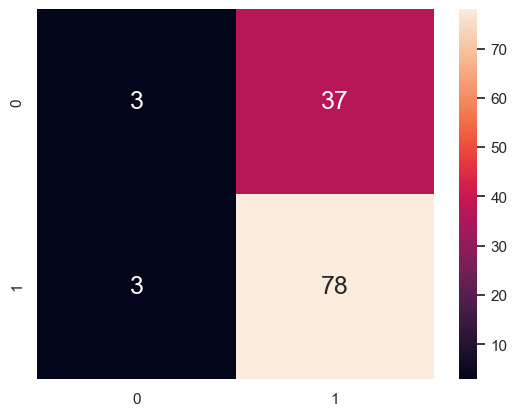

In [744]:
sb.heatmap(confusion_matrix(y_test, y_test_predcl), annot = True, fmt = ".0f", annot_kws = {"size" : 18})

In [745]:
print("Test Data")
print("Accuracy  :\t", model2.score(cholesterol_test, y_test))
print()

cmTestcl = confusion_matrix(y_test, y_test_pred)
tpTestcl = cmTestcl[1][1] # True Positives
fpTestcl = cmTestcl[0][1] # False Positives
tnTestcl = cmTestcl[0][0] # True Negatives
fnTestcl = cmTestcl[1][0] # False Negatives

print("TPR Test :\t", (tpTestcl/(tpTestcl + fnTestcl)))
print("TNR Test :\t", (tnTestcl/(tnTestcl + fpTestcl)))
print()

print("FPR Test :\t", (fpTestcl/(fpTestcl + tnTestcl)))
print("FNR Test :\t", (fnTestcl/(fnTestcl + tpTestcl)))

Test Data
Accuracy  :	 0.6694214876033058

TPR Test :	 0.7037037037037037
TNR Test :	 0.725

FPR Test :	 0.275
FNR Test :	 0.2962962962962963


<h3>Logistic Regression using MaxHR</h3>

In [746]:
model3 = LogisticRegression(solver = 'liblinear', random_state = 0)
model3.fit(maxhr_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [747]:
model3.coef_

array([[-0.02117213]])

<AxesSubplot:xlabel='MaxHR'>

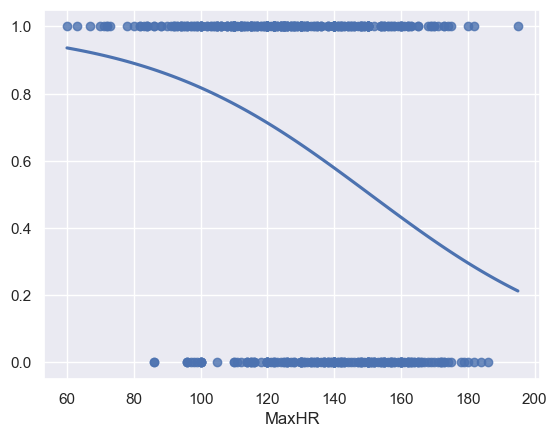

In [748]:
sb.regplot(x = maxhr_train, y = y_train, data = data1, logistic = True, ci = None)

In [749]:
y_train_predhr = model3.predict(maxhr_train)

<AxesSubplot:>

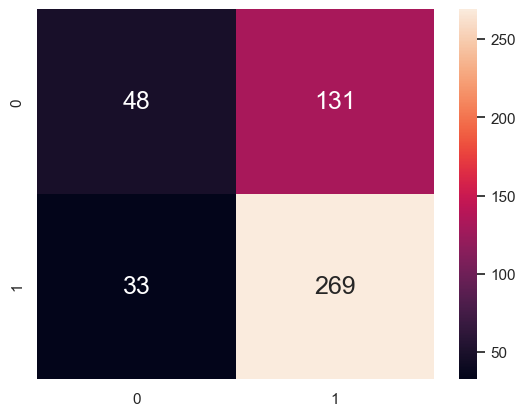

In [750]:
sb.heatmap(confusion_matrix(y_train, y_train_predhr), annot = True, fmt = ".0f", annot_kws = {"size" : 18})

In [751]:
print("Train Data")
print("Accuracy  :\t", model3.score(maxhr_train, y_train))
print()

cmTrainhr = confusion_matrix(y_train, y_train_predhr)
tpTrainhr = cmTrainhr[1][1] # True Positives
fpTrainhr = cmTrainhr[0][1] # False Positives
tnTrainhr = cmTrainhr[0][0] # True Negatives
fnTrainhr = cmTrainhr[1][0] # False Negatives

print("TPR Train :\t", (tpTrainhr/(tpTrainhr + fnTrainhr)))
print("TNR Train :\t", (tnTrainhr/(tnTrainhr + fpTrainhr)))
print()

print("FPR Train :\t", (fpTrainhr/(tnTrainhr + fpTrainhr)))
print("FNR Train :\t", (fnTrainhr/(tpTrain + fnTrainhr)))

Train Data
Accuracy  :	 0.659043659043659

TPR Train :	 0.890728476821192
TNR Train :	 0.2681564245810056

FPR Train :	 0.7318435754189944
FNR Train :	 0.12992125984251968


In [752]:
y_test_predhr = model3.predict(maxhr_test)

<AxesSubplot:>

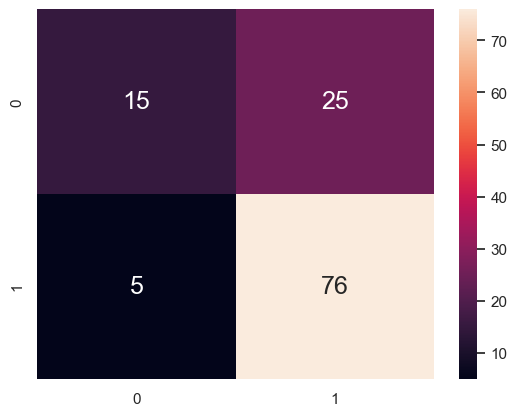

In [753]:
sb.heatmap(confusion_matrix(y_test, y_test_predhr), annot = True, fmt = ".0f", annot_kws = {"size" : 18})

In [754]:
print("Test Data")
print("Accuracy  :\t", model3.score(maxhr_test, y_test))
print()

cmTesthr = confusion_matrix(y_test, y_test_pred)
tpTesthr = cmTesthr[1][1] # True Positives
fpTesthr = cmTesthr[0][1] # False Positives
tnTesthr = cmTesthr[0][0] # True Negatives 
fnTesthr = cmTesthr[1][0] # False Negatives 

print("TPR Test :\t", (tpTesthr/(tpTesthr + fnTesthr)))
print("TNR Test :\t", (tnTesthr/(tnTesthr + fpTesthr)))
print()

print("FPR Test :\t", (fpTesthr/(fpTesthr + tnTesthr)))
print("FNR Test :\t", (fnTesthr/(fnTesthr + tpTesthr)))

Test Data
Accuracy  :	 0.7520661157024794

TPR Test :	 0.7037037037037037
TNR Test :	 0.725

FPR Test :	 0.275
FNR Test :	 0.2962962962962963


<h3>Printing out the respective models metric on the test dataset</h3>

In [755]:
print("RestingBP model")
print("Accuracy  :\t", model1.score(restingbp_test, y_test))
print()

print("TPR Test :\t", (tpTestBP/(tpTestBP + fnTestBP)))
print("TNR Test :\t", (tnTestBP/(tnTestBP + fpTestBP)))
print()
print("FPR Test :\t", (fpTestBP/(fpTestBP + tnTestBP)))
print("FNR Test :\t", (fnTestBP/(fnTestBP + tpTestBP)))

print()
print("Cholesterol model")
print("Accuracy  :\t", model2.score(cholesterol_test, y_test))
print()

print("TPR Test :\t", (tpTestcl/(tpTestcl + fnTestcl)))
print("TNR Test :\t", (tnTestcl/(tnTestcl + fpTestcl)))
print()

print("FPR Test :\t", (fpTestcl/(fpTestcl + tnTestcl)))
print("FNR Test :\t", (fnTestcl/(fnTestcl + tpTestcl)))

print()
print("MaxHR model")
print("Accuracy  :\t", model3.score(maxhr_test, y_test))
print()

print("TPR Test :\t", (tpTesthr/(tpTesthr + fnTesthr)))
print("TNR Test :\t", (tnTesthr/(tnTesthr + fpTesthr)))
print()

print("FPR Test :\t", (fpTesthr/(fpTesthr + tnTesthr)))
print("FNR Test :\t", (fnTesthr/(fnTesthr + tpTesthr)))

RestingBP model
Accuracy  :	 0.6611570247933884

TPR Test :	 0.7037037037037037
TNR Test :	 0.725

FPR Test :	 0.275
FNR Test :	 0.2962962962962963

Cholesterol model
Accuracy  :	 0.6694214876033058

TPR Test :	 0.7037037037037037
TNR Test :	 0.725

FPR Test :	 0.275
FNR Test :	 0.2962962962962963

MaxHR model
Accuracy  :	 0.7520661157024794

TPR Test :	 0.7037037037037037
TNR Test :	 0.725

FPR Test :	 0.275
FNR Test :	 0.2962962962962963


<h3>We can observe that MaxHR have the highest classification accuracy, followed by RestingBP and Cholesterol</h3>